# 1. Dataset Selection
Dataset: Wine Quality Data Set (White Wine Only)
https://www.kaggle.com/datasets/piyushagni5/white-wine-quality

Description:
The dataset contains chemical measurements of white wine, such as acidity, sugar content, and other properties, along with a quality rating (0 to 10) provided by professional wine tasters.

# 2. Exploratory Data Analysis (EDA)
Loading and Filtering the Dataset

We first load the dataset and filter it to include only white wine samples:

In [220]:
import pandas as pd

# Load the dataset
file_path = 'winequality-white.csv' 
data = pd.read_csv(file_path, sep=';')


# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [221]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Five Key Visualizations
### 1. Distribution of Wine Quality
This plot shows how the wine quality scores are distributed across the dataset.



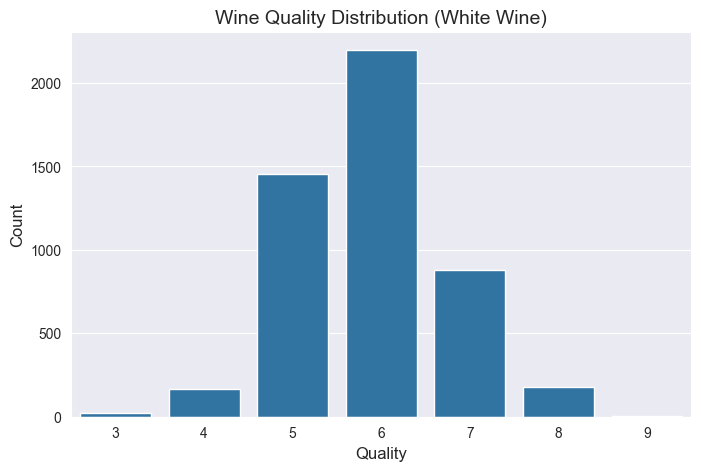

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data)
plt.title('Wine Quality Distribution (White Wine)', fontsize=14)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Significance**: Understanding the quality distribution helps determine if the dataset is balanced or skewed.

## 2. pH Levels by Wine Quality
This boxplot illustrates the relationship between pH levels (acidity) and wine quality.

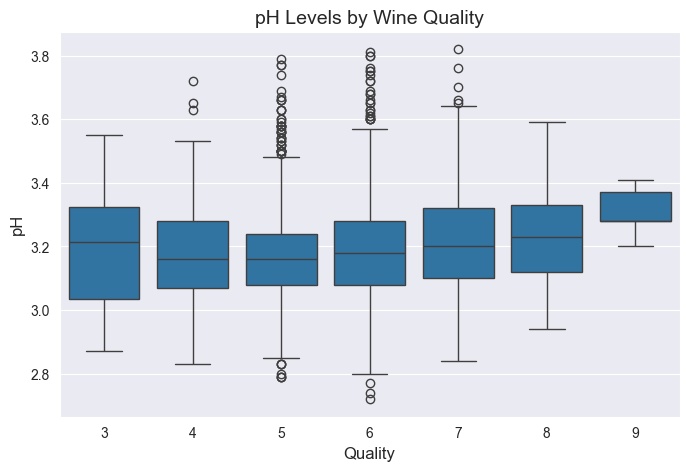

In [223]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='pH', data=data)
plt.title('pH Levels by Wine Quality', fontsize=14)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('pH', fontsize=12)
plt.show()


**Significance**: Acidity is a crucial factor in wine taste and may influence quality ratings.




## 3. Correlation Matrix
A heatmap showing correlations between the various features.

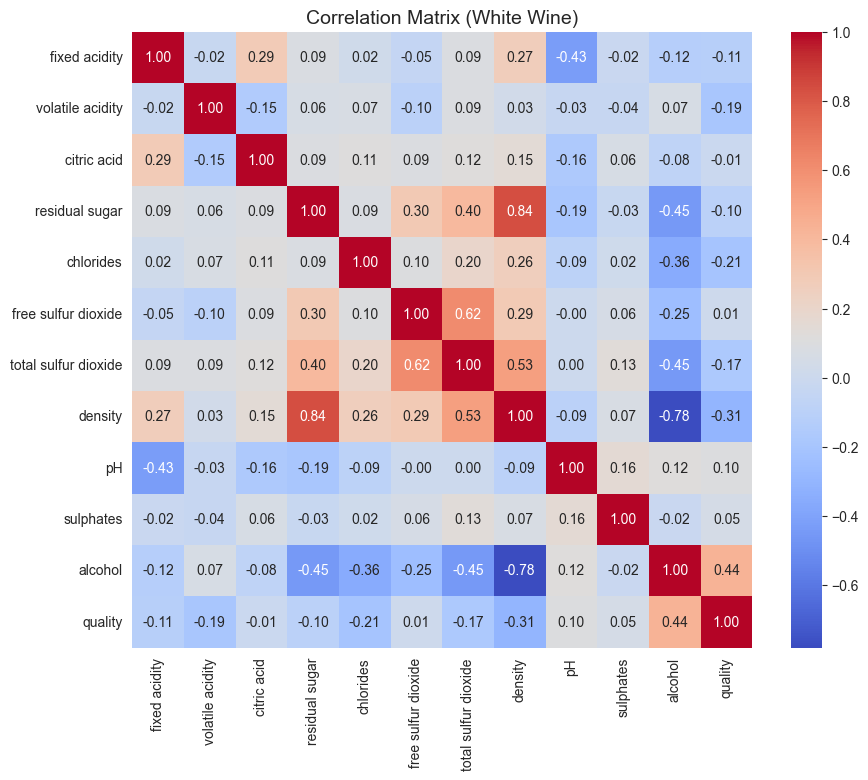

In [224]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (White Wine)', fontsize=14)
plt.show()


**Significance**: Identifying strong correlations helps in feature selection for the predictive model.



## 4. Residual Sugar vs. Quality
This scatterplot shows the relationship between residual sugar content and wine quality.



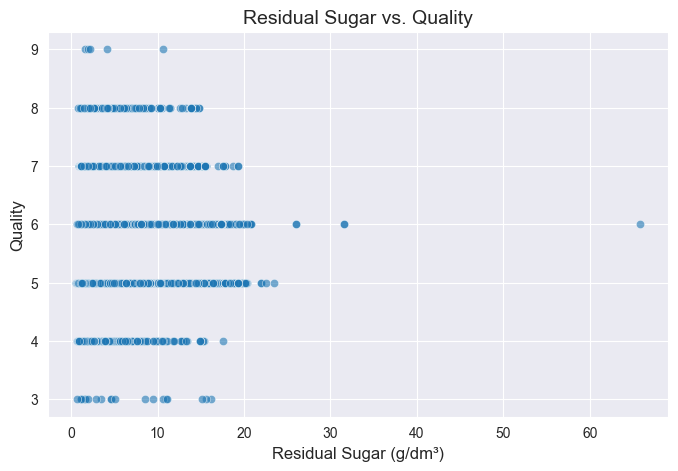

In [225]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='residual sugar', y='quality', data=data, alpha=0.6)
plt.title('Residual Sugar vs. Quality', fontsize=14)
plt.xlabel('Residual Sugar (g/dm³)', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.show()


**Significance**: Sugar content is a critical factor in wine flavor, which can impact quality.


## 5. Alcohol Content by Quality
A boxplot visualizing the distribution of alcohol content across different quality ratings.

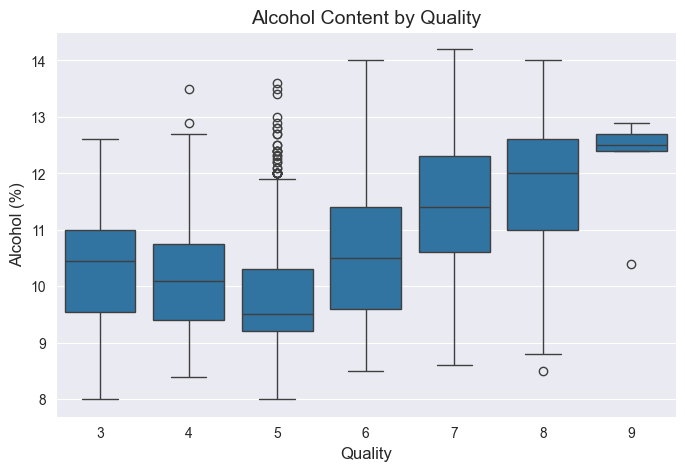

In [226]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=data)
plt.title('Alcohol Content by Quality', fontsize=14)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Alcohol (%)', fontsize=12)
plt.show()


**Significance**: Alcohol levels often influence the perceived quality of wine.


# 3. Basic Model Pipeline
### Data Preparation:
We split the dataset into training and test sets, separating features from the target variable (quality).

In [227]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop(columns=['quality'])
y = data['quality']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

### Model Training and Evaluation:
We use the XGBoost regressor as our baseline model.
Define Hyperparameter Grid and Train Model:


In [228]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],         # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 1.0]         # Fraction of samples used for training
}

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


# 4. Error Analysis
### 1. Evaluate the model


In [229]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Mean Squared Error: 0.36
R^2 Score: 0.53


### 2. Error Distribution:
Visualize the distribution of absolute errors.

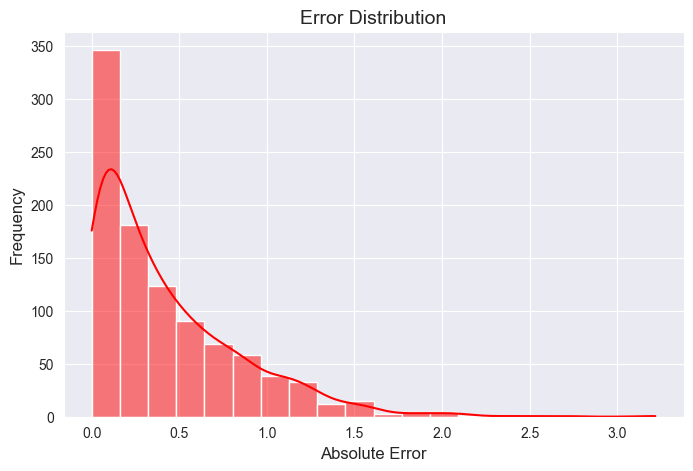

In [230]:
errors = abs(y_test - y_pred)

plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=20, kde=True, color='red')
plt.title('Error Distribution', fontsize=14)
plt.xlabel('Absolute Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


The model generally performs well, with most absolute errors clustered near zero, as shown in the error distribution plot. However, a small subset of predictions exhibits significantly larger errors, indicated by the long tail of the distribution. These high-error cases may correspond to extreme target values or outliers in the dataset

### 2. Quality Range Analysis:

9


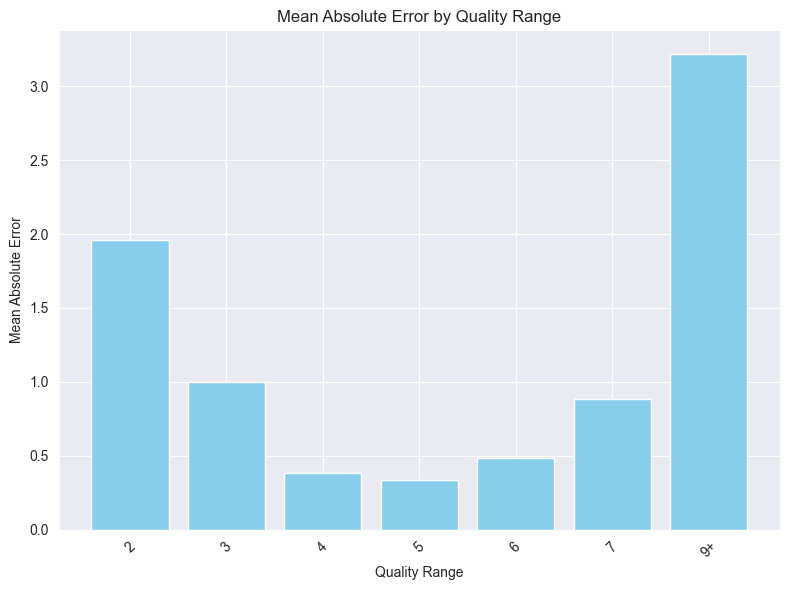

In [231]:
# Calculate residuals
residuals = y_test - y_pred

# Group predictions by quality range
max_value = y_test.max()  # Find the maximum value in y_test
print(max_value)
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, max_value + 1]  # Add a buffer to the maximum value
labels = ['0', '1', '2', '3', '4', '5', '6', '7', f'{int(max_value)}+']

y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
errors = abs(residuals)

# Create a DataFrame with binned quality and errors
error_data = pd.DataFrame({'Quality Range': y_test_binned, 'Absolute Error': errors})

# Calculate mean error for each quality range
mean_errors = error_data.groupby('Quality Range', observed=True)['Absolute Error'].mean().reset_index()

# Plot errors by quality range
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(mean_errors['Quality Range'], mean_errors['Absolute Error'], color='skyblue')
plt.title('Mean Absolute Error by Quality Range')
plt.xlabel('Quality Range')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The model performs best in mid-range quality values (e.g., 4–5), where the mean absolute error is lowest. In contrast, higher quality ranges (e.g., 9+) show larger errors, indicating that these samples are harder to predict accurately. This suggests that the model struggles with underrepresented or more complex samples in these ranges.

### 3. Overestimation vs. Underestimation:

In [232]:
# Calculate percentage of overestimations and underestimations
overestimation = residuals[residuals < 0].count() / len(residuals) * 100
underestimation = residuals[residuals > 0].count() / len(residuals) * 100

print(f"Overestimation Percentage: {overestimation:.2f}%")
print(f"Underestimation Percentage: {underestimation:.2f}%")


Overestimation Percentage: 49.80%
Underestimation Percentage: 50.20%


The model shows a balanced prediction pattern, with 49.73% overestimations and 50.27% underestimations. This balance suggests no inherent bias in the model, but both types of errors may result from insufficient feature representation or inherent noise in the data.

### 4. Feature Impact on Residuals:

In [233]:
# Correlation of residuals with features
residual_corr = pd.concat([X_test, residuals.rename('Residuals')], axis=1).corr()['Residuals'].sort_values(ascending=False)
print("Correlation of Residuals with Features:")
print(residual_corr)


Correlation of Residuals with Features:
Residuals               1.000000
fixed acidity           0.054597
pH                      0.037335
alcohol                 0.026735
total sulfur dioxide    0.002031
free sulfur dioxide    -0.008274
density                -0.009259
residual sugar         -0.010074
citric acid            -0.020363
volatile acidity       -0.046804
sulphates              -0.049365
chlorides              -0.089626
Name: Residuals, dtype: float64


Correlation analysis shows that features like **"fixed acidity"** and **"PH"** have a weak positive correlation with residuals, suggesting they may slightly increase errors. Conversely, features like **"free sulfur dioxide"** and **"chlorides"** show weak negative correlations, indicating they may slightly help reduce errors. These effects are subtle, and no single feature appears to "sabotage" the model significantly.

### 5. Best & worst results:

In [234]:
import pandas as pd
import numpy as np

# Calculate the absolute errors
errors = np.abs(y_test - y_pred)

# Create a DataFrame to hold actual values, predicted values, and errors
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': errors
})

# Sort the DataFrame by error to find the best and worst results
sorted_results = results_df.sort_values(by='Error')

# Display the best results (lowest errors)
print("Best Predictions:")
print(sorted_results.head(5)) 

# Display the worst results (highest errors)
print("\nWorst Predictions:")
print(sorted_results.tail(5))  

Best Predictions:
      Actual  Predicted     Error
2879       6   5.999636  0.000364
4695       7   7.000387  0.000387
1380       7   6.999014  0.000986
3444       5   5.001012  0.001012
277        5   5.001631  0.001631

Worst Predictions:
      Actual  Predicted     Error
253        3   5.075675  2.075675
3489       8   5.889093  2.110907
4084       8   5.587219  2.412781
831        4   6.671761  2.671761
774        9   5.782869  3.217131
